In [29]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
raw_data = pd.read_excel("https://github.com/HrantDavtyan/BA_BA/blob/master/Churn.xls?raw=true")

In [31]:
raw_data.shape

(3333, 21)

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [33]:
raw_data.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921


In [34]:
data = raw_data.select_dtypes(exclude=["object"])
data.head(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,415


In [35]:
data.Churn.value_counts()/len(data)*100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

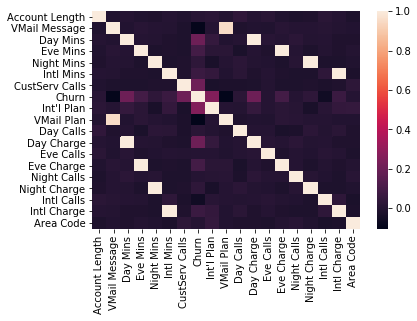

In [36]:
sns.heatmap(data.corr())
plt.show()

In [37]:
model_tree = DecisionTreeClassifier(random_state=42)
model_logit = LogisticRegression(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

In [38]:
y = data.Churn
x = data.drop("Churn",axis=1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [40]:
model_tree.fit(x_train,y_train)
model_logit.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [41]:
print(model_tree.score(x_train,y_train))
print(model_logit.score(x_train,y_train))
print(model_rf.score(x_train,y_train))
print(model_gb.score(x_train,y_train))

1.0
0.8631452581032413
0.9935974389755903
0.974389755902361


In [42]:
print(model_tree.score(x_test,y_test))
print(model_logit.score(x_test,y_test))
print(model_rf.score(x_test,y_test))
print(model_gb.score(x_test,y_test))

0.8896882494004796
0.8573141486810552
0.9316546762589928
0.9412470023980816


In [43]:
tree_pred = model_tree.predict(x_test)
logit_pred = model_logit.predict(x_test)
rf_pred = model_rf.predict(x_test)
gb_pred = model_gb.predict(x_test)

In [45]:
print(roc_auc_score(y_test,tree_pred))
print(roc_auc_score(y_test,logit_pred))
print(roc_auc_score(y_test,rf_pred))
print(roc_auc_score(y_test,gb_pred))

0.7799062245932129
0.5864025660158817
0.8046586998407378
0.8426143514238938


In [47]:
print(cross_val_score(model_tree,x,y,cv=5))
print(cross_val_score(model_logit,x,y,cv=5))
print(cross_val_score(model_rf,x,y,cv=5))
print(cross_val_score(model_gb,x,y,cv=5))

[0.90854573 0.91904048 0.92503748 0.91591592 0.91891892]
[0.86656672 0.85607196 0.85457271 0.87087087 0.86036036]
[0.94302849 0.93253373 0.96101949 0.93843844 0.94294294]
[0.95052474 0.94002999 0.95952024 0.95945946 0.95645646]
